

# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects 110.527 of medical appointments with its 14 associated characteristics. The most important one if the patient show-up or no-show to the appointment. These 14 attributes are considered as 13 independant variables and only one is dependant which is the No-show attribute.

**Data Dictionary**
<ul>
<li> 01 - PatientId: Identification of a patient</li>
<li> 02 - AppointmentID: Identification of each appointment </li>
<li> 03 - Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man. </li>
<li> 04 - DataMarcacaoConsulta: The day of the actuall appointment, when they have to visit the doctor.</li>
<li> 05 - DataAgendamento: The day someone called or registered the appointment, this is before appointment of course. </li>
<li> 06 - Age: How old is the patient. </li>
<li> 07 - Neighbourhood: Where the appointment takes place.</li>
<li> 08 - Scholarship: True of False. </li>
<li> 09 - Hipertension: True or False </li>
<li> 10 - Diabetes: True or False </li>
<li> 11- Alcoholism: True or False </li>
<li> 12- Handcap: True or False </li>
<li> 13- SMS_received: 1 or more messages sent to the patient. </li>
<li> 14- No-show: True or False. </li>
</ul>

### Question(s) for Analysis
The first questions that come to head when analyzing patients' appointment data is: What makes a patient miss his appointment? Is that affected by his age? Or maybe the place where he took on? or the time delay to his appointment?
These questions can be answered by processing the collected data and applying the needed statistics which will be detailed in the next sections

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [36]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.3
    Uninstalling pandas-1.4.3:
      Successfully uninstalled pandas-1.4.3
  Running setup.py install for pandas: started
  Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\win10\anaconda3\envs\emna\lib\site-packages\pandas-1.4.3.dist-info\
   from C:\Users\win10\anaconda3\envs\emna\Lib\site-packages\~andas-1.4.3.dist-info
  Moving to c:\users\win10\anaconda3\envs\emna\lib\site-packages\pandas\
   from C:\Users\win10\anaconda3\envs\emna\Lib\site-packages\~andas


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [907 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-3.8\pandas
  copying pandas\testing.py -> build\lib.win-amd64-3.8\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-3.8\pandas
  copying pandas\_version.py -> build\lib.win-amd64-3.8\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-3.8\pandas
  creating build\lib.win-amd64-3.8\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-3.8\pandas\api
  creating build\lib.win-amd64-3.8\pandas\arrays
  copying pandas\arrays\__init__.py -> build\lib.win-amd64-3.8\pandas\arrays
  creating build\lib.win-amd64-3.8\pandas\compat
  copying pandas\compat\chainmap.py -> build\lib.win-amd64-3.8\pandas\compat
  copying pandas\compat\pick

  copying pandas\io\msgpack\__init__.py -> build\lib.win-amd64-3.8\pandas\io\msgpack
  creating build\lib.win-amd64-3.8\pandas\io\sas
  copying pandas\io\sas\sas7bdat.py -> build\lib.win-amd64-3.8\pandas\io\sas
  copying pandas\io\sas\sasreader.py -> build\lib.win-amd64-3.8\pandas\io\sas
  copying pandas\io\sas\sas_constants.py -> build\lib.win-amd64-3.8\pandas\io\sas
  copying pandas\io\sas\sas_xport.py -> build\lib.win-amd64-3.8\pandas\io\sas
  copying pandas\io\sas\__init__.py -> build\lib.win-amd64-3.8\pandas\io\sas
  creating build\lib.win-amd64-3.8\pandas\plotting\_matplotlib
  copying pandas\plotting\_matplotlib\boxplot.py -> build\lib.win-amd64-3.8\pandas\plotting\_matplotlib
  copying pandas\plotting\_matplotlib\compat.py -> build\lib.win-amd64-3.8\pandas\plotting\_matplotlib
  copying pandas\plotting\_matplotlib\converter.py -> build\lib.win-amd64-3.8\pandas\plotting\_matplotlib
  copying pandas\plotting\_matplotlib\core.py -> build\lib.win-amd64-3.8\pandas\plotting\_matplotl

  copying pandas\tests\generic\test_series.py -> build\lib.win-amd64-3.8\pandas\tests\generic
  copying pandas\tests\generic\__init__.py -> build\lib.win-amd64-3.8\pandas\tests\generic
  creating build\lib.win-amd64-3.8\pandas\tests\groupby
  copying pandas\tests\groupby\conftest.py -> build\lib.win-amd64-3.8\pandas\tests\groupby
  copying pandas\tests\groupby\test_apply.py -> build\lib.win-amd64-3.8\pandas\tests\groupby
  copying pandas\tests\groupby\test_bin_groupby.py -> build\lib.win-amd64-3.8\pandas\tests\groupby
  copying pandas\tests\groupby\test_categorical.py -> build\lib.win-amd64-3.8\pandas\tests\groupby
  copying pandas\tests\groupby\test_counting.py -> build\lib.win-amd64-3.8\pandas\tests\groupby
  copying pandas\tests\groupby\test_filters.py -> build\lib.win-amd64-3.8\pandas\tests\groupby
  copying pandas\tests\groupby\test_function.py -> build\lib.win-amd64-3.8\pandas\tests\groupby
  copying pandas\tests\groupby\test_groupby.py -> build\lib.win-amd64-3.8\pandas\tests\gro

  copying pandas\tests\test_join.py -> build\lib.win-amd64-3.8\pandas\tests
  copying pandas\tests\test_lib.py -> build\lib.win-amd64-3.8\pandas\tests
  copying pandas\tests\test_multilevel.py -> build\lib.win-amd64-3.8\pandas\tests
  copying pandas\tests\test_nanops.py -> build\lib.win-amd64-3.8\pandas\tests
  copying pandas\tests\test_optional_dependency.py -> build\lib.win-amd64-3.8\pandas\tests
  copying pandas\tests\test_register_accessor.py -> build\lib.win-amd64-3.8\pandas\tests
  copying pandas\tests\test_sorting.py -> build\lib.win-amd64-3.8\pandas\tests
  copying pandas\tests\test_strings.py -> build\lib.win-amd64-3.8\pandas\tests
  copying pandas\tests\test_take.py -> build\lib.win-amd64-3.8\pandas\tests
  copying pandas\tests\__init__.py -> build\lib.win-amd64-3.8\pandas\tests
  creating build\lib.win-amd64-3.8\pandas\tseries
  copying pandas\tseries\api.py -> build\lib.win-amd64-3.8\pandas\tseries
  copying pandas\tseries\converter.py -> build\lib.win-amd64-3.8\pandas\tser

  copying pandas\io\clipboard\windows.py -> build\lib.win-amd64-3.8\pandas\io\clipboard
  copying pandas\io\clipboard\__init__.py -> build\lib.win-amd64-3.8\pandas\io\clipboard
  creating build\lib.win-amd64-3.8\pandas\io\excel
  copying pandas\io\excel\_base.py -> build\lib.win-amd64-3.8\pandas\io\excel
  copying pandas\io\excel\_odfreader.py -> build\lib.win-amd64-3.8\pandas\io\excel
  copying pandas\io\excel\_openpyxl.py -> build\lib.win-amd64-3.8\pandas\io\excel
  copying pandas\io\excel\_util.py -> build\lib.win-amd64-3.8\pandas\io\excel
  copying pandas\io\excel\_xlrd.py -> build\lib.win-amd64-3.8\pandas\io\excel
  copying pandas\io\excel\_xlsxwriter.py -> build\lib.win-amd64-3.8\pandas\io\excel
  copying pandas\io\excel\_xlwt.py -> build\lib.win-amd64-3.8\pandas\io\excel
  copying pandas\io\excel\__init__.py -> build\lib.win-amd64-3.8\pandas\io\excel
  creating build\lib.win-amd64-3.8\pandas\io\formats
  copying pandas\io\formats\console.py -> build\lib.win-amd64-3.8\pandas\io\f

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
pd.options.display.max_rows = 9
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head(1)


  copying pandas\tests\indexes\test_frozen.py -> build\lib.win-amd64-3.8\pandas\tests\indexes
  copying pandas\tests\indexes\test_numeric.py -> build\lib.win-amd64-3.8\pandas\tests\indexes
  copying pandas\tests\indexes\test_numpy_compat.py -> build\lib.win-amd64-3.8\pandas\tests\indexes
  copying pandas\tests\indexes\test_range.py -> build\lib.win-amd64-3.8\pandas\tests\indexes
  copying pandas\tests\indexes\test_setops.py -> build\lib.win-amd64-3.8\pandas\tests\indexes
  copying pandas\tests\indexes\__init__.py -> build\lib.win-amd64-3.8\pandas\tests\indexes
  creating build\lib.win-amd64-3.8\pandas\tests\indexing
  copying pandas\tests\indexing\common.py -> build\lib.win-amd64-3.8\pandas\tests\indexing
  copying pandas\tests\indexing\conftest.py -> build\lib.win-amd64-3.8\pandas\tests\indexing
  copying pandas\tests\indexing\test_callable.py -> build\lib.win-amd64-3.8\pandas\tests\indexing
  copying pandas\tests\indexing\test_categorical.py -> build\lib.win-amd64-3.8\pandas\tests\i

  copying pandas\tests\test_join.py -> build\lib.win-amd64-3.8\pandas\tests
  copying pandas\tests\test_lib.py -> build\lib.win-amd64-3.8\pandas\tests
  copying pandas\tests\test_multilevel.py -> build\lib.win-amd64-3.8\pandas\tests
  copying pandas\tests\test_nanops.py -> build\lib.win-amd64-3.8\pandas\tests
  copying pandas\tests\test_optional_dependency.py -> build\lib.win-amd64-3.8\pandas\tests
  copying pandas\tests\test_register_accessor.py -> build\lib.win-amd64-3.8\pandas\tests
  copying pandas\tests\test_sorting.py -> build\lib.win-amd64-3.8\pandas\tests
  copying pandas\tests\test_strings.py -> build\lib.win-amd64-3.8\pandas\tests
  copying pandas\tests\test_take.py -> build\lib.win-amd64-3.8\pandas\tests
  copying pandas\tests\__init__.py -> build\lib.win-amd64-3.8\pandas\tests
  creating build\lib.win-amd64-3.8\pandas\tseries
  copying pandas\tseries\api.py -> build\lib.win-amd64-3.8\pandas\tseries
  copying pandas\tseries\converter.py -> build\lib.win-amd64-3.8\pandas\tser

  copying pandas\tests\arrays\categorical\test_indexing.py -> build\lib.win-amd64-3.8\pandas\tests\arrays\categorical
  copying pandas\tests\arrays\categorical\test_missing.py -> build\lib.win-amd64-3.8\pandas\tests\arrays\categorical
  copying pandas\tests\arrays\categorical\test_operators.py -> build\lib.win-amd64-3.8\pandas\tests\arrays\categorical
  copying pandas\tests\arrays\categorical\test_repr.py -> build\lib.win-amd64-3.8\pandas\tests\arrays\categorical
  copying pandas\tests\arrays\categorical\test_sorting.py -> build\lib.win-amd64-3.8\pandas\tests\arrays\categorical
  copying pandas\tests\arrays\categorical\test_subclass.py -> build\lib.win-amd64-3.8\pandas\tests\arrays\categorical
  copying pandas\tests\arrays\categorical\test_warnings.py -> build\lib.win-amd64-3.8\pandas\tests\arrays\categorical
  copying pandas\tests\arrays\categorical\__init__.py -> build\lib.win-amd64-3.8\pandas\tests\arrays\categorical
  creating build\lib.win-amd64-3.8\pandas\tests\arrays\interval
  

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### This returns a tuple of the dimensions of the dataframe

In [4]:
df.shape

(110527, 14)

#### Let's take a look on the datatypes of the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Check for missing data in the dataset

In [6]:
df.isnull().sum()

PatientId        0
AppointmentID    0
Gender           0
ScheduledDay     0
                ..
Alcoholism       0
Handcap          0
SMS_received     0
No-show          0
Length: 14, dtype: int64

There is no value missing in this data, so we don't need to handle this issue

#### Check for duplicates in the data

In [7]:
sum(df.duplicated())

0

There is no duplicated values in this data, so we don't need to handle this issue

#### We will check the number of appointements and number of patients

In [8]:
df['AppointmentID'].nunique(), df['PatientId'].nunique()

(110527, 62299)

The number of patients is equal to 62299 which is inferior to the number of rows; We conclude that we had patients
who got more than an appointment. Meanwhile, the number of appointement is equal to the number of rows.
However, we cannot see any useful information from these two columns. For this reason, we will drop them.

#### check the type of ScheduledDay and AppointmentDay

In [9]:
type(df['ScheduledDay'][0]) , type(df['AppointmentDay'][0])  

(str, str)

Although the datatype for ScheduledDay and AppointmentDay appears to be object, further investigation shows it's a string.
We propose to convert these two columns to datetime type in the next section. 

#### check the correctness of ScheduledDay 

In [10]:
# we will check if the appointement day is valid, i.e, the appointement day should be on the same day of the ScheduledDay or days after
df_wrongAppointment = df.query('AppointmentDay < ScheduledDay')
df_wrongAppointment.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We notice that there are appointements with wrong data. An appointement is valid only if it is on the same day or days after.
In the next step, we will drop these rows as they are considered as wrong informations.


### Data Cleaning

#### 1- Incorrect data:

As mentionned above, although the datatype for ScheduledDay and AppointmentDay appears to be object, further investigation shows it's a string.
We propose to convert these two columns to datetime type in the next section. Before that, we notice that ScheduledDay and AppointmentDay appear in a format %Y-%m-%dT%h:%m:%sZ. We assume that only the day, month, and years are important, so we will split the String date using the "T" to extract them.

In [11]:
# We assume that only the day, month, and years are important, so we will split the String date using the "T" to extract them.
df['ScheduledDay']=df['ScheduledDay'].apply(lambda x:x.split("T")[0])
df['AppointmentDay']=df['AppointmentDay'].apply(lambda x:x.split("T")[0])


In [12]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

#### 2- Unuseful Information: Dropping AppointmentID and PatientId columns

In [13]:
# we cannot see any useful information from these two columns. For this reason, we will drop them.
df.drop(['AppointmentID','PatientId'], axis=1, inplace= True)

#### 3- Data not Valid: Dropping rows where AppointmentDay < ScheduledDay

In [14]:
df.drop(df_wrongAppointment.index, axis=0, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

In [15]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000
mean,38.502564,0.092706,0.208897,0.074723,0.025320,0.020025,0.493086
std,22.925421,0.290021,0.406523,0.262946,0.157096,0.154072,0.499956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


##### First we try to overlook the distribution of different attributes of our data

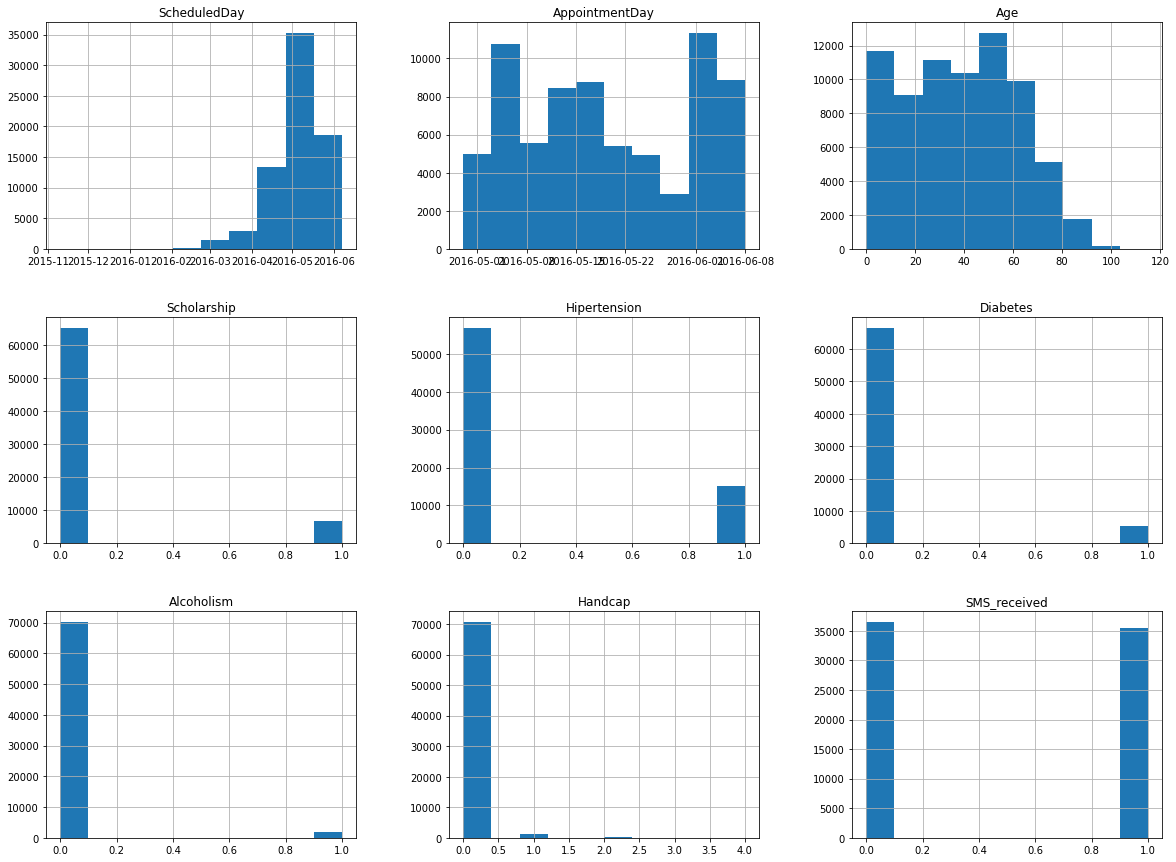

In [16]:
df.hist(figsize=(20,15));

##### Create a function called visualize to optimize the code Instead of writing same lines for every plot

In [37]:
def visualize(x, y, dataset, Xsize, Ysize):
    plt.figure(figsize=(Xsize,Ysize))
    ax = sns.countplot(x=x, hue=y, data=dataset)
    return(ax)

#### Does the gender affect the attendance?


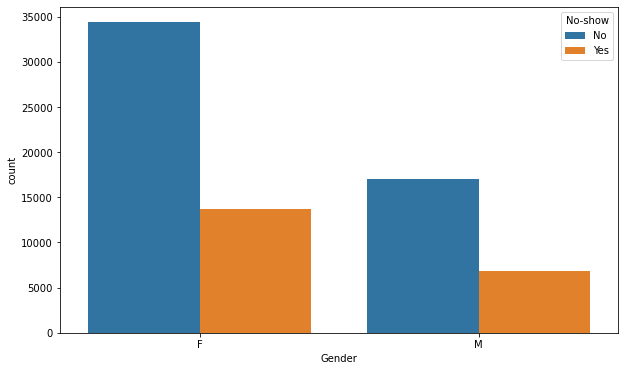

In [40]:
#Does the gender affect the attendance?
#calling of the function
visualize(df['Gender'], df['No-show'], df, 10, 6);

<li>Answer to reviewer's note:</li>

In this graph, we aim to visualize the number of women and men who show up, and who were absent; in other words, we are trying to compare two categories which are : Women vs Men and two states: attendance vs absence.
Seaborn offers a variety of graph types, however the most adequate for this case is the countplot.

As we can see, Women attend their appointment more than men do.

### Research Question 1  (Does the Age affect the attendance of the patient?)

In [18]:
#First we create two data: the first one the attended patients, and te second one for the who were absent
df_no = df[df['No-show'] == 'No']
df_yes = df[df['No-show'] == 'Yes']

In [19]:
df_no.shape, df_yes.shape, 

((51437, 12), (20522, 12))

As a first test, we can see that the number of patients who attends their appointement is superior to those who were absent.
We will plot these results by visualizing the distribution of Age

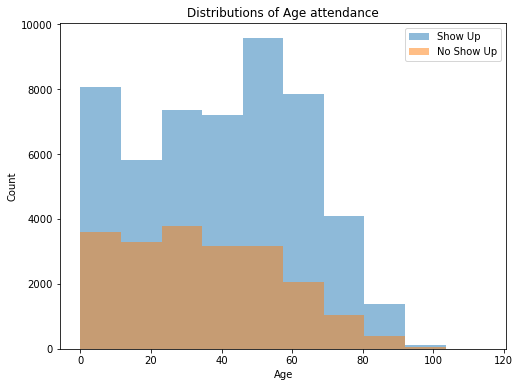

In [20]:

fig, ax = plt.subplots(figsize =(8,6))
ax.hist(df_no['Age'], alpha=0.5, label='Show Up')
ax.hist(df_yes['Age'], alpha=0.5, label='No Show Up')
ax.set_title('Distributions of Age attendance')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show();

The distribution shape of both attended and absent patients is almost alike. We just notice that at a young age, the number of patients is higher and we assume that their presence is related to their parents. Also, the number of the attended person increases between around 35 and 70 years old, and can be justified that human immunity is decreasing since that age, which demands more medical appointments

### Research Question 2  (Does the Neighbourhood affect the attendance of the patient?)

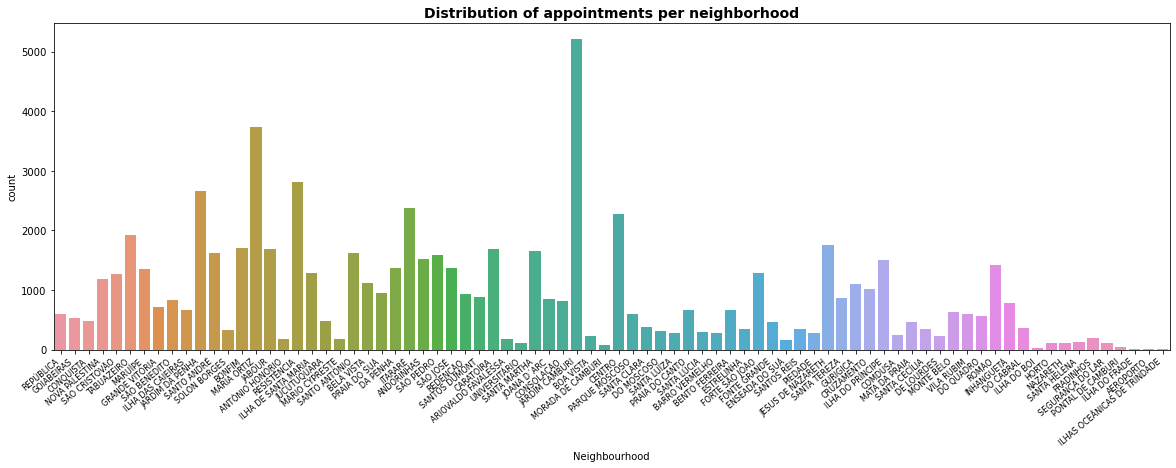

In [21]:
# Let's start by visualizing the distribution of appointement by Neighbourhood
plt.figure(figsize=(20,6))
ax = sns.countplot(x='Neighbourhood', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Distribution of appointments per neighborhood', fontsize=14, fontweight='bold')
plt.show()

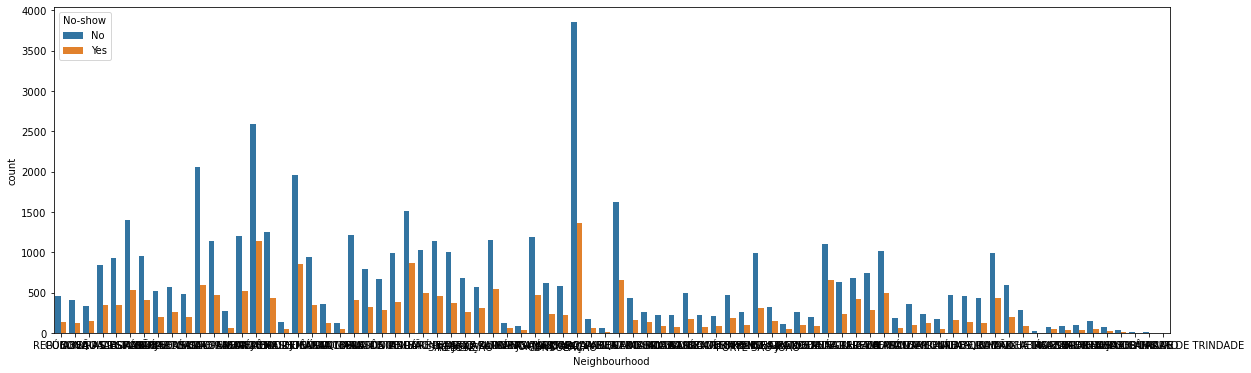

In [41]:
# we will visualize the distribution of attended / absent patients per Neighbourhood
visualize(df['Neighbourhood'], df['No-show'], df, 20, 6);

Same as for the age, the distributuon of No/Yes attendance is behaving alike. we just remark that the maximum number of appointment was in Jardim Camburi followed by Maria Ortiz
We think that we need more detail concerning Neighbourhood so that we can understand the reason behind the number of appointement, such as the weather, the food quality, standard of living, etc..


In [23]:
df_place = df.groupby(['Neighbourhood', 'No-show']).count().AppointmentDay
df2_place=df_place.unstack(level='No-show')

In [24]:
# The results will be more easy to explore graphically; to do so, we will visualize the number of attendace per neiberhood
# We choose the Horizontal bar plots as it is usually used to visualize places
# When exploring the example of Horizontal bar plots, it seems clear that we need a new column where we calculate the total number of appointement per neighberhood
df2_place['Total_appointment']= df2_place['No']+df2_place['Yes']
df2_place=df2_place.reset_index()
df2_place.head(5)

No-show,Neighbourhood,No,Yes,Total_appointment
0,AEROPORTO,4.0,1.0,5.0
1,ANDORINHAS,1033.0,491.0,1524.0
2,ANTÔNIO HONÓRIO,137.0,43.0,180.0
3,ARIOVALDO FAVALESSA,118.0,57.0,175.0
4,BARRO VERMELHO,206.0,79.0,285.0


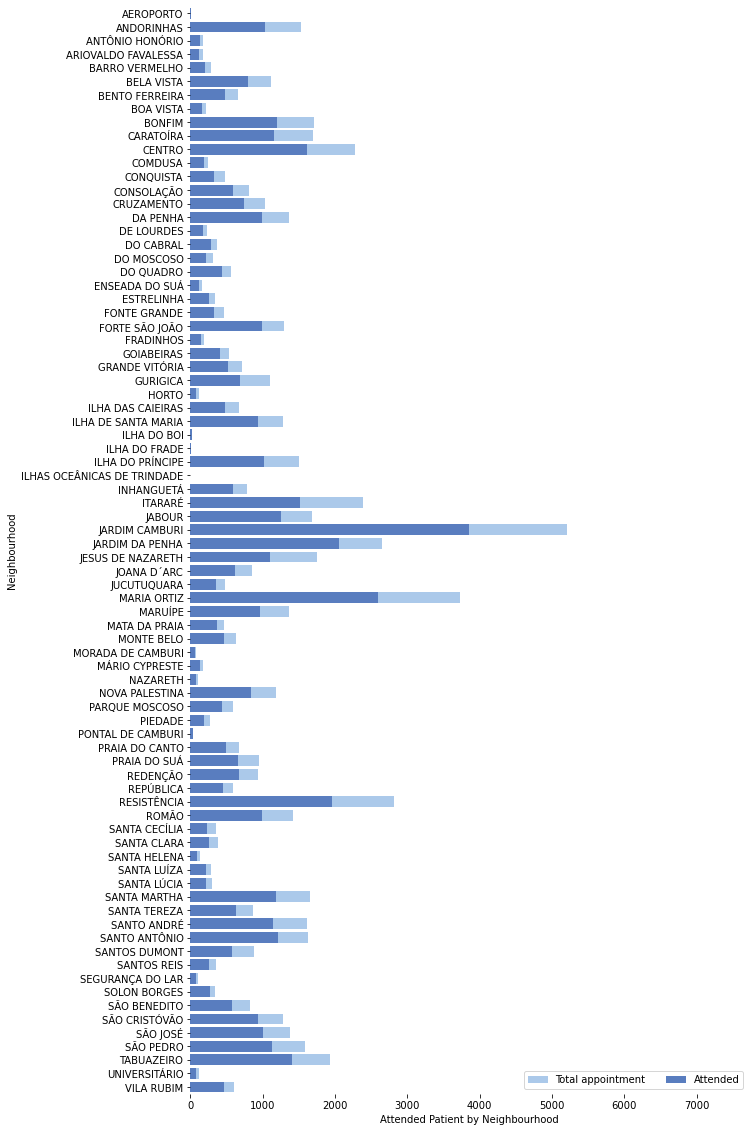

In [25]:
#Visualizing the results

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 20))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Total_appointment", y="Neighbourhood", data=df2_place,
            label="Total appointment", color="b")

# Plot the attended patients
sns.set_color_codes("muted")
sns.barplot(x="No", y="Neighbourhood", data=df2_place,
            label="Attended", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,7717),ylabel="Neighbourhood",
       xlabel="Attended Patient by Neighbourhood")
sns.despine(left=True, bottom=True)

### Research Question 3 (Does the waiting time affect the attendance of the patient?)

#### we propose to add a column referring to the waiting time to the appointment day

In [26]:
waiting = df['AppointmentDay']-df['ScheduledDay']
# we extract only the value referring to the waiting date
df['waiting']=waiting.astype("timedelta64[D]")

In [27]:
# We overlook the waiting date
df['waiting'].describe()

count    71959.000000
mean        15.642018
std         16.494334
min          1.000000
25%          4.000000
50%          9.000000
75%         22.000000
max        179.000000
Name: waiting, dtype: float64

<AxesSubplot:>

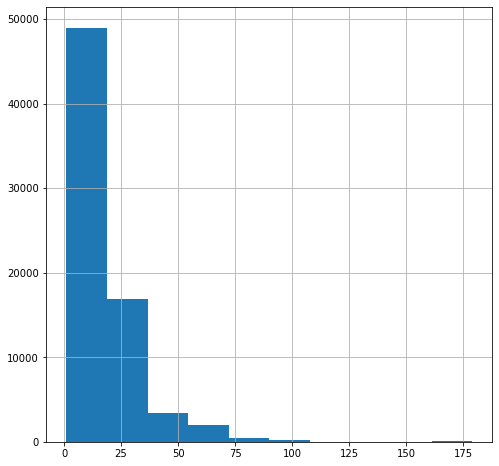

In [28]:
df['waiting'].hist(figsize=(8,8))

Most appointement take place within few days. we propose to split the waiting time to 4 intervals so the analyze will be easier

In [29]:
# We will split the different values of waiting time into 4 intervals: Soon, Medium, Far and Too Far, so that the analysis will be more easy to interpret
df['wait'] = pd.cut(df['waiting'],[0, 4, 15, 30,179], labels=['Soon','Medium','Far','Too Far'])

In [30]:
df.groupby(['wait','No-show']).count().AppointmentDay

wait     No-show
Soon     No         15375
         Yes         4590
Medium   No         18400
         Yes         7348
Far      No         10709
         Yes         5159
Too Far  No          6953
         Yes         3425
Name: AppointmentDay, dtype: int64

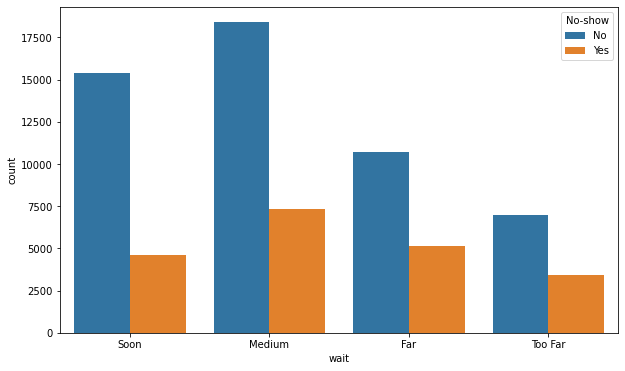

In [31]:
df_time_lead=df.groupby(['wait','No-show']).count().AppointmentDay

#calling of the function
visualize(df['wait'], df['No-show'], df, 10, 6);

We notice here, that the most attendance is realized when the waiting time is whether soon or medium. When to appointment day is too far, the patient will not probably show up. 

<a id='conclusions'></a>
## Conclusions

> **Gender** To summarize, it is clear that women attend their appointment more than men.

> **Age** young patients and patients between 35 and 70 years old, showed up more than other ages

> **Neighberhood** the distribution of neighberhood was so similar, we think that we need more information for this feature, related to health and medical appointment. 

> **Waiting day** we assume that the waiting day affects the attendance of a patient. The more the appointement is far, the more is probable to not showing up.


> **Limitations**: By lack of time, we couldn't perform the necessary statistical tests; such as the ratio of attendance according to the waiting time, as well as the neiberhood. A seaborn plot is needed to more illustrate the results.
We also didn't analyze the other features like handicap, diabetic, scholarship... which we will 


In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0